# Регулярные выражения в Python
ссылка: https://www.youtube.com/watch?v=zk7306cHIkg

Computer Science Center
Опубликовано: 27 дек. 2017 г.

### План лекции:
- что такое регулярные выражения ("регэкспы", от англ. Regular Expressions), чем они полезны, когда использовать их, а когда выбирать другие инструменты);

- обзор синтаксиса и возможностей;
- особенности регекспов в языке Python;
- неочевидные моменты, грабли и ловушки.

О лекторе: Николай Меркин — разработчик в компании Яндекс.    

Лекция будет полезной для пользователей языка Python, владеющих им хотя бы на самом поверхностном уровне (диалекты 2.* или 3.*).    
Слайды: https://yadi.sk/d/bWV4tQei3R2cDb (тут HTML слайды)    

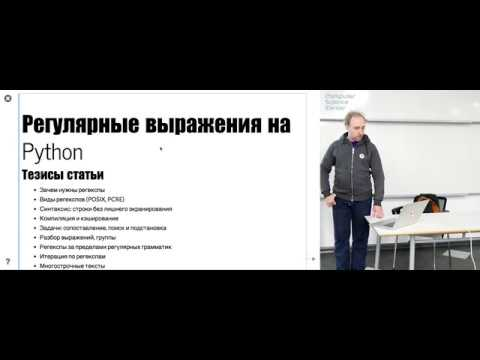

In [1]:
from IPython.display import YouTubeVideo
# Регулярные выражения в Python
# Video credit: Computer Science Center
YouTubeVideo('zk7306cHIkg')

## Регулярные выражения на Python

### Тезисы статьи

- Зачем нужны регекспы
- Виды регекспов (POSIX, PCRE)
- Синтаксис: строки без лишнего экранирования
- Компиляция и кэширование
- Задачи: сопоставление, поиск и подстановка
- Разбор выражений, группы
- Регекспы за пределами регулярных грамматик
- Итерация по регекспам
- Многострочные тексты

### Зачем нужны регекспы
Когда вы разбираете содержимое строки (ищете фрагменты), то у вас есть три пути:

- написать разбор вручную - посимвольное чтение, поиск ключевых частей в заданных позициях
- найти готовый парсер
- написать выражение, отражающее структуру строки

In [2]:
# пример: на входе файл на питоне, надо перечислить все функции, которые в нём объявлены
src = '''
# def foo(): # эта строка закомментирована, мы её не считаем
def bar(x,y,z):
    def buz(): # вложенная функция
        pass
    pass
'''
print(src)


# def foo(): # эта строка закомментирована, мы её не считаем
def bar(x,y,z):
    def buz(): # вложенная функция
        pass
    pass



In [3]:
# сперва разобьём файл на строки
lines = src.splitlines()
for l in lines:
    print(repr(l))

''
'# def foo(): # эта строка закомментирована, мы её не считаем'
'def bar(x,y,z):'
'    def buz(): # вложенная функция'
'        pass'
'    pass'


In [4]:
for line in lines:
    line = line.strip()
    comment = line.find('#')
    if comment > 0:
        line = line[:comment]
    if not line.startswith('def '):
        continue
    line = line[4:].strip()
    bracket = line.find('(')
    if bracket < 0:
        continue
    line = line[:bracket].strip()
    if not line:
        continue
    print('found function: ', line)

found function:  bar
found function:  buz


In [5]:
# то же самое на регекспах
import re
for line in lines:
    match = re.match(r'^\s*def\s+\b(.*?)\b\(', line)
    if match:
        print('found function: ', match.group(1))

found function:  bar
found function:  buz


### Python умеет "из коробки"
* XML и HTML
    * https://docs.python.org/3/library/markup.html
    * https://pypi.python.org/pypi/beautifulsoup4
* CSV - https://docs.python.org/3/library/csv.html
* INI - https://docs.python.org/3/library/configparser.html
* JSON - https://docs.python.org/3/library/json.html
* URL - https://docs.python.org/3/library/urllib.parse.html#module-urllib.parse
* командную строку
    * https://docs.python.org/3/library/getopt.html
    * https://docs.python.org/3/library/argparse.html
* форматирование строк и текстов
* и многое многое другое...

_"Всё уже украдено до нас!"_ А для всего остального и существуют прямые руки и регулярные выражения.

### Виды регулярных выражений
* Настоящие регулярные выражения - описывают регулярную грамматику, для разбора которой достаточно конечного автомата
* Перл-совместимые - перепрыгивают через класс контекстно-свободных грамматик и дают подкласс контекстно-зависимых

### Грамматики Хомского   

3) Регулярные (для разбора достаточен конечный автомат)    
2) Контекстно-свободные (стековый автомат)    
1) Контекстно-зависимые (машина Поста или Тьюринга)    
0) Неограниченные

__Любую регулярную грамматику можно записать с помощью регекспа, вопрос лишь в громоздкости__

__Не всякую контекстно-зависимую грамматику можно выразить регекспом__

__Не всякую контекстно-свободную грамматику можно выразить регекспом__

## Закон регекспов

Если у вас есть проблема, и вы придумали, как решить её регекспом - у вас две проблемы

## Самый Страшный Регексп
Это, конечно же, email из RFC-822 (http://www.ietf.org/rfc/rfc822.txt)

```
(?:(?:\r\n)?[ \t])*(?:(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*)|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*:(?:(?:\r\n)?[ \t])*(?:(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[ \t])*)(?:,\s*(?:(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*|(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)*\<(?:(?:\r\n)?[ \t])*(?:@(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*(?:,@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*)*:(?:(?:\r\n)?[ \t])*)?(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|"(?:[^\"\r\\]|\\.|(?:(?:\r\n)?[ \t]))*"(?:(?:\r\n)?[ \t])*))*@(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*)(?:\.(?:(?:\r\n)?[ \t])*(?:[^()<>@,;:\\".\[\] \000-\031]+(?:(?:(?:\r\n)?[ \t])+|\Z|(?=[\["()<>@,;:\\".\[\]]))|\[([^\[\]\r\\]|\\.)*\](?:(?:\r\n)?[ \t])*))*\>(?:(?:\r\n)?[
```

## На самом деле, есть менее страшный RFC5322
http://www.ietf.org/rfc/rfc5322.txt

Попроще (https://stackoverflow.com/questions/201323/using-a-regular-expression-to-validate-an-email-address/1917982#1917982)
```
([-!#-'*+/-9=?A-Z^-~]+(\.[-!#-'*+/-9=?A-Z^-~]+)*|"([]!#-[^-~ \t]|(\\[\t -~]))+")@([-!#-'*+/-9=?A-Z^-~]+(\.[-!#-'*+/-9=?A-Z^-~]+)*|\[[\t -Z^-~]*])
```

Посложнее (https://stackoverflow.com/questions/201323/using-a-regular-expression-to-validate-an-email-address/1917982) - с исправлением недочёта в разборе IP-адреса)

```
(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])
```

### Виды регекспов: BRE, SRE, ERE... и PCRE
Описаны в стандарте POSIX (подробнее см. в википедии https://en.wikipedia.org/wiki/Regular_expression#Standards)

* __BRE__ - basic regexp - минимально необходимый (и исторически самый первый) язык регулярных выражений
* __SRE__ - simple regexp - добавляет к BRE метасимволы и классы символов
* __ERE__ - extended regexp - добавляет к SRE полезняшки - именованные классы, произвольные повторы

Особняком стоит __PCRE__ - __p__erl-__c__ompatible __re__gexp - который добавляет к ERE много нового.

### Базовые регекспы (BRE) содержат

* произвольные конкретные символы
* класс `"."` = любой символ
* повтор `"*"` - ноль и более раз
* группировка `"(", ")"` и ветвление `"|"`

Исторически, в BRE метасимволы `"(", "|", ")"` нужно было экранировать префиксом `"\"`. Те, кто пишет скрипты на баше и вовсю пользуется утилитами `sed` и `grep`, сталкиваются с этим.

In [6]:
print(re.match(r'a*b*c*|def', 'aaaa'))

<_sre.SRE_Match object; span=(0, 4), match='aaaa'>


### Расширенные регекспы (SRE, ERE)
Добавляют много полезняшек, по-прежнему оставаясь в рамках регулярных грамматик

* классы символов `"[abc0-9]"` - эквивалентно ветвлению `"(a|b|c|0|1|...|9)"`
* негативные классы `"[^ \t\n]"` - эквивалентно ветвлению по всем остальным символам
* популярные классы `"\s"`, `"\d"`, `"\w"` и их дополнения `"\S"`, `"\D"`, `"\W"`; именные классы `"[[:digit:]]"` и т.п. - в питоне их нет
* начало и конец строки `"^"`, `"$"` - фиктивные символы, незримо присутствующие в строке (в окрестностях символа `"\n"`)
* начало и конец слова `"\b"`, и наоборот `"\B"` - фиктивные символы
* произвольные повторы `"{m,n}"` заданного количества раз, ну и `"?" = "{0,1}", "+" = "{1,}", "*" = "{0,}"`

In [7]:
print(re.match(r'a*b*c*|def', 'aaaa'))
print(re.match(r'[[:digit:]]+', '123')) # python не умеет полноценный ERE
print(re.match(r'\d+', '123'))

<_sre.SRE_Match object; span=(0, 4), match='aaaa'>
None
<_sre.SRE_Match object; span=(0, 3), match='123'>


In [8]:
print(re.match(r'[[:digit:]]+', '123')) # python не умеет полноценный ERE
print(re.match(r'\d+', '123'))

None
<_sre.SRE_Match object; span=(0, 3), match='123'>


Python недотягивает до полноценного ERE, поэтому его внутренние названия модулей и классов содержат аббревиатуру SRE.

### Регекспы Perl-Compatible (PCRE)
Ленивое и жадное распознавание

Атомарная группировка (отсечка при откатах). В питоне её нет

Навороченный синтаксис групп (об этом - позже)

* именованные
* ссылки назад
* заглядывания вперёд

In [9]:
# жадное сопоставление
print(re.match(r'<bold>.*</bold>', '<bold>some</bold> more <bold>text</bold>'))

<_sre.SRE_Match object; span=(0, 40), match='<bold>some</bold> more <bold>text</bold>'>


In [10]:
# ленивое сопоставление: .*?
print(re.match(r'<bold>.*?</bold>', '<bold>some</bold> more <bold>text</bold>'))

<_sre.SRE_Match object; span=(0, 17), match='<bold>some</bold>'>


### Строки для регекспов
Проблема в том, что в регекспах есть спецсимволы - а поэтому есть и экранирование спецсимволов (хорошо известный бэкслеш `"\"`). Чтобы не экранировать экранирование, есть специальный синтаксис: `r"..."` и `r'...'`

In [11]:
s = r'\[\]\\"' # спецсимволы регекспа [, ], \, а также спецсимвол строки "
print(s)
print(repr(s))
print(s == '\\[\\]\\\\"')
print(s == "\\[\\]\\\\\"") # если бы мы писали в обычном сишном синтаксисе...
#           ^  ^  ^ ^ ^  экранирование спецсимволов строки
#           ^^ ^^ ^^     экранирование спецсимволово регекспа

\[\]\\"
'\\[\\]\\\\"'
True
True


r-строки сочетаются с юникодными и байтовыми (u- и b-строками), а в __Python 3.6+__ - ещё и с f-строками.

* `br'...'` - байтовая (актуально для python3, т.к. в python2 обычные строки байтовые)
* `ur'...'` - юникодная (напротив: актуально для python2)
* `fr'...'` - форматированная

Форматированной байтовой, увы, нет.

In [12]:
world, bworld = 'мир', b'world'
print(br'hello %s' % bworld)
print(r'привет %s' % world)
print(fr'привет {world}')

b'hello world'
привет мир
привет мир


### Громоздкие регекспы

Не пытайтесь написать всё в одну строку самостоятельно. Сделайте подобие формы Бэкуса-Наура

In [13]:
optsign = r'[+\-]?'
int_opt_frac = r'\d+(\.\d*)?'
just_frac = r'\.\d+'
mantissa = optsign + r'(' + int_opt_frac + r'|' + just_frac + r')'
order = r'[Ee]' + optsign + r'\d+'
floatpoint = mantissa + r'(' + order + r')?'

print(floatpoint)

[+\-]?(\d+(\.\d*)?|\.\d+)([Ee][+\-]?\d+)?


In [14]:
# то же самое на fr-строках только дял Python 3.6+
optsign = r'[+\-]?'
int_opt_frac = r'\d+(\.\d*)?'
just_frac = r'\.\d+'
mantissa = fr'{optsign}({int_opt_frac}|{just_frac})'
order = fr'[Ee]{optsign}\d+'
floatpoint = fr'{mantissa}({order})?'

print(floatpoint)

[+\-]?(\d+(\.\d*)?|\.\d+)([Ee][+\-]?\d+)?


In [15]:
# Используйте пробелы и комментарии
floatpoint_v = r'''
[+\-]?           # optional sign
(                # mantissa value
  \d+ (\. \d*)?  #   integral part with optional fraction
| \. \d+         #   no integral part with mandatory fraction
)                # end of mantissa
(                # optional order
  [Ee]           #   the tag
  [+\-]?         #   optional sign
  \d+            #   integer order
)?               # end of optional order
'''
print(floatpoint_v) # да, там честные пробелы и переводы строк!
re.match(floatpoint_v, '-123.45e-67', re.VERBOSE)


[+\-]?           # optional sign
(                # mantissa value
  \d+ (\. \d*)?  #   integral part with optional fraction
| \. \d+         #   no integral part with mandatory fraction
)                # end of mantissa
(                # optional order
  [Ee]           #   the tag
  [+\-]?         #   optional sign
  \d+            #   integer order
)?               # end of optional order



<_sre.SRE_Match object; span=(0, 11), match='-123.45e-67'>

### Компиляция и кэширование

Чтобы применить регексп, его сперва нужно разобрать и перевести в удобный для быстрого исполнения код. Как минимум, проверить на ошибки. Построить машину состояний и всё такое.

In [16]:
r = re.compile(floatpoint)
print(type(r))
print(r)
print(r.match('123.45e+67'))
print(r.match('-.e5'))

<class '_sre.SRE_Pattern'>
re.compile('[+\\-]?(\\d+(\\.\\d*)?|\\.\\d+)([Ee][+\\-]?\\d+)?')
<_sre.SRE_Match object; span=(0, 10), match='123.45e+67'>
None


Явная компиляция захламляет код: мы вводим имя скомпилированного регекспа, пишем отдельную инструкцию, заставляем бегать глазами между местом определения и местами использования.

Регекспы можно подставлять прямо в функции поиска:

In [17]:
print(re.match(floatpoint, '123.45e+67'))
# то же самое, что
print(re.compile(floatpoint).match('123.45e+67'))

<_sre.SRE_Match object; span=(0, 10), match='123.45e+67'>
<_sre.SRE_Match object; span=(0, 10), match='123.45e+67'>


Но что будет, если мы вызовем один регексп много-много раз? Например, в цикле? Это же безумие - компилировать одно и то же.

In [18]:
for s in ['123', '4.', '.5', '6e7']:
    print(re.compile(floatpoint).match(s))

<_sre.SRE_Match object; span=(0, 3), match='123'>
<_sre.SRE_Match object; span=(0, 2), match='4.'>
<_sre.SRE_Match object; span=(0, 2), match='.5'>
<_sre.SRE_Match object; span=(0, 3), match='6e7'>


Весь наш опыт подсказывает: скомпилируйте единожды.

А здравый смысл разработчиков питона говорит: __узбагойтес!__ Просто не компилируйте, подставьте строку регекспа.

При первом обращении она скомпилируется, далее всё, что мы заплатим - это поиск в хеш-таблице по строковому ключу. (Если регексп длинный, то, пожалуй, лучше всё-таки скомпилировать).

### Сопоставление, поиск и подстановка
Проще всего воспользоваться аналогией с обычными строками:

* сравнение
* поиск подстроки
* замена
* разбиение

Ниже приведены точные соответствия - поэтому регекспы вырождены до обычных строк.

### Сопоставление и поиск

In [19]:
s = 'hello the world'
print(s.startswith('hello'))
print(re.match(r'hello', s))
print(re.match(r'\w{5}', s)) # начинается на слово из 5 букв

True
<_sre.SRE_Match object; span=(0, 5), match='hello'>
<_sre.SRE_Match object; span=(0, 5), match='hello'>


In [20]:
print(s.find('the'))
print(re.search(r'the', s))
print(re.search(r'\b\w{3}\b', s)) # содержит слово ровно из 3 букв

6
<_sre.SRE_Match object; span=(6, 9), match='the'>
<_sre.SRE_Match object; span=(6, 9), match='the'>


### Замена

In [21]:
s = 'hello the world'
print(s.replace('l', 'L'))
print(re.sub(r'l', 'L', s))
print(re.sub(r'[eaoui]', 'e...', s))

heLLo the worLd
heLLo the worLd
he...lle... the... we...rld


In [22]:
print(s.replace('l', 'L', 1)) # замена заданного количества вхождений
print(re.sub(r'l', 'L', s, 1))
print(re.sub(r'[eaoui]', 'e...', s, 1))

heLlo the world
heLlo the world
he...llo the world


### Разбиение (найти и выбросить искомый текст)

In [23]:
print(s.split('l'))
print(re.split(r'l', s))
print(re.split(r'[eaoui]', s)) # разделитель - гласная
print(re.split(r'\b\w{1,3}\b', 'hello the world of long and short words')) # разделители - короткие слова

['he', '', 'o the wor', 'd']
['he', '', 'o the wor', 'd']
['h', 'll', ' th', ' w', 'rld']
['hello ', ' world ', ' long ', ' short words']


In [24]:
# Частный случай: разбиение пробелами
spaceful = 'hello  \t   world  \n  of  spaces'
print(spaceful.split())
print(re.split(r'\s+', spaceful))

['hello', 'world', 'of', 'spaces']
['hello', 'world', 'of', 'spaces']


In [25]:
# Частный случай: разбиение на линии
multiline = '''
first line
second line
'''
print(multiline.splitlines())
print(multiline.splitlines(True))
print(re.split(r'\n', multiline))
print(re.findall(r'.*\n', multiline)) # не придумал, как сделать на re.split

['', 'first line', 'second line']
['\n', 'first line\n', 'second line\n']
['', 'first line', 'second line', '']
['\n', 'first line\n', 'second line\n']


Важный неприятный момент: если поиск оказался неуспешным, то `re.match` или `re.sub` вернут не "пустой результат" типа `_sre.SRE_Match`, а значение другого типа - `None`.

Для проверки на истинность это непринципиально, а вот для глубокого анализа - уже потребует ветвлений.

In [26]:
print(re.match(r'something', 'hello the world'))

None


In [27]:
print(s.find('the'))  # позиция искомой подстроки
print(s.find('some')) # либо -1 как признак неудачи

6
-1


In [28]:
s = 'hello the world'
print(re.search(r'the', s).start())
print(re.search(r'some', s)) # у None нет метода start()

6
None


In [29]:
rs = re.search(r'some', 'hello the world')
if rs:
    print(rs.start())
else:
    print('not found')

not found


### Сложные замены
Заменять искомую подстроку можно на:

In [30]:
# постоянную строку (это самое простое)
re.sub(r'the', 'some', 'hello the world')

'hello some world'

In [31]:
# комбинацию из частей искомой строки (ниже мы поговорим про группы)
re.sub(r'\b(\w+)\b', r'<\1>', 'hello the world')

'<hello> <the> <world>'

In [32]:
re.sub(r'(.)(.)o', r'<\2,\1>', 'hello the world')

'he<l,l> the<w, >rld'

И наконец, самое интересное: замена на результат вычислений.

Например, мы можем перевести искомую строку в верхний регистр.

In [33]:
re.sub(r'[aoe]', lambda m : m.group().upper(), 'hello the world')

'hEllO thE wOrld'

In [34]:
def encode(c):
    return '%%%02X' % ord(c)

re.sub(r'\s', lambda m : encode(m.group()), 'hello \t world')

'hello%20%09%20world'

In [35]:
def decode(m):
    e = m.group(1)
    i = int(e, 16)
    return chr(i)

re.sub(r'%([0-9a-fA-F]{2})', decode, 'hello%20%09%20world')

'hello \t world'

### Группы
Результат сопоставления - это не просто подстрока, а нечто, обладающее структурой.

Мы можем узнать, каким фрагментам регекспа соответствуют те или иные фрагменты строки. Границы этих фрагментов обозначаются в регекспе скобками.

In [36]:
print(re.match(r'\b(\w+)\b (\w(\w)\w)', 'hello the world').groups()) # вывести все группы
#                  1___1      3__3
#                          2________2

('hello', 'the', 'h')


In [37]:
m = re.match(r'\b(\w+)\b (\w(\w)\w)', 'hello the world')
print(m.group())
print(m.group(0))
print(m.group(1,3)) # кортеж из только тех групп, которые нас интересуют

hello the
hello the
('hello', 'h')


In [38]:
print(re.match(r'(.(..).)+', 'hello the world').group(0, 1, 2))
#                             |__________| - 0
#                             |__||__||__| - 1 & 2
# Штирлиц знал, что запоминается последнее

('hello the wo', 'e wo', ' w')


Что будет, если группа участвует в повторе?

In [39]:
print(re.match(r'(.(..).)+', 'hello the world').group(0, 1, 2))
#                             |__________| - 0
#                             |__||__||__| - 1 & 2
# Штирлиц знал, что запоминается последнее

('hello the wo', 'e wo', ' w')


Всё просто и понятно: парсер - это автомат. Он бежит и запоминает: "скобка номер N встретилась в позиции P", потом добегает до следующего удачного сопадения и запоминает новую позицию, и так далее.

А если группа участвует в альтернативе?

In [40]:
print(re.match(r'(hello)|(goodbye)', 'hello the world').groups())

('hello', None)


Ещё одна бомбочка от системы типов питона: отсутствующая группа - это не пустая строка, а `None`

Ну и последняя забавная бомбочка: альтернатива в цикле

In [41]:
print(re.match(r'(([aouei])|(.))+', 'hello the world').group(2, 3))
# последняя гласная, последняя согласная

('o', 'd')


### Именованные группы
Или - что делать, если скобок слишком много? И далеко не все они нам важны?

В строках подстановки и обратных ссылках (об этом позже) мы ограничены именами `"\1"` - `"\99999"`, которые, к тому же, конфликтуют с обычными цифрами, идущими вслед за именем.

Если мы собираем регексп из кусочков, номера групп могут меняться.

In [42]:
r1 = r'(I|thou|he|she)|(we|you|they)' # 1 - singular, 2 - plural
r2 = r'(we|you|they)|(I|thou|he|she)' # 1 - plural, 2 - singular

In [43]:
# (?P<name>...) - именованная группа (по-прежнему доступна и по номеру)
rs = r'(?P<singular>I|thou|he|she)'
rp = r'(?P<plural>we|you|they)'
r = rs + '|' + rp # или наоборот
print(re.search(r, 'I and you').groupdict())
print(re.search(r, 'you and I').groupdict())

{'singular': 'I', 'plural': None}
{'singular': None, 'plural': 'you'}


### Ненумерованная группа
Не захламляет пространство номеров

In [44]:
# (?:...) ненумерованная группа
re.match(r'(?:hello|goodbye) (.*)', 'hello the world').group(1)

'the world'

In [45]:
re.match(r'((?:a|bb|ccc)+)(d+)', 'abbadddd').group(1, 2)

('abba', 'dddd')

### Где использовать именованные группы?
* В запросах к результату поиска - методы group, groups, groupdict
* В строках подстановки
* В обратных ссылках

In [46]:
re.sub(r'(?P<first>\b\w+\b) (?P<junction>and|or) (?P<second>\b\w+\b)',
       r'\g<second> \g<junction> \g<first>',
       'there were Alfa and Beta sitting on a tube')

'there were Beta and Alfa sitting on a tube'

In [47]:
m = re.search(r'<(?P<tag>\w+)[^>]*>(?P<inside>.*?)</(?P=tag)>',
              'some <bold>text goes</bold> here')
print(m.group('tag', 'inside', 0))

('bold', 'text goes', '<bold>text goes</bold>')


Это был пример контекстно-зависимой грамматики. Тут надо подумать, как это записать. Что-то наподобие
```
S             ->  tag T body B
T             ->  [a-z]+
B             ->  .*
tag T body B  ->  "<" T ">" B "</" T ">"
```

### Заглядывание (look ahead, look behind)
Это предусловия: "если мы встретили строку, то..." саму эту строку не запоминаем.

In [48]:
# (?=...) - начиная с этого места, будет совпадение
r = r'(?=.*?[!])\w+' # первое слово восклицательного предложения
for phrase in ['hello!', 'yes it is!', 'is anybody there?']:
    print(re.match(r, phrase))

<_sre.SRE_Match object; span=(0, 5), match='hello'>
<_sre.SRE_Match object; span=(0, 3), match='yes'>
None


In [49]:
# (?!...) - не будет совпадения (отсечка)
r = r'(?!.*?white monkey)\w+' # первое слово предложения, не содержащего белую обезьяну
for phrase in ['it is very easy', 'not to think', 'about white monkey or something else']:
    print(re.match(r, phrase))

<_sre.SRE_Match object; span=(0, 2), match='it'>
<_sre.SRE_Match object; span=(0, 3), match='not'>
None


In [50]:
# (?<=...) - текущей позиции предшествовало...
# (?<!...) - или не предшествовало...
re.search(r'(?<=hello) \d+[!]', 'goodbye 123! hello 456!')

<_sre.SRE_Match object; span=(18, 23), match=' 456!'>

In [51]:
re.search(r'(?<!hello) \d+', 'hello 123! goodbye 456!')

<_sre.SRE_Match object; span=(18, 22), match=' 456'>

### Итерирование по результатам поиска
Мы можем

* выполнить одну или все подстановки (если занимаемся подстановками)
* как уже выяснили, для каждой подстановки вызвать колбек-функцию
* найти первое совпадение

Наверное, есть способы

* найти следующее совпадение
* все совпадения

In [52]:
s = 'hello the world'
p = -1
while True:
    p = s.find('l', p+1)
    if p < 0:
        break
    print(p, s[p:])

2 llo the world
3 lo the world
13 ld


In [53]:
re.findall(r'[^aouei][aouei]', s) # пара согласная-гласная

['he', 'lo', 'he', 'wo']

In [54]:
for m in re.finditer(r'[^aouei][aouei]', s):
    print(m)

<_sre.SRE_Match object; span=(0, 2), match='he'>
<_sre.SRE_Match object; span=(3, 5), match='lo'>
<_sre.SRE_Match object; span=(7, 9), match='he'>
<_sre.SRE_Match object; span=(10, 12), match='wo'>


### Многострочные тексты
Последний нюанс, о котором хочется сказать: как регекспы работают со строками, содержащими перевод строки.

Метасимволы `"^"`, `"$"` могут обозначать или начало и конец всей строки, или начало и конец каждой линии. Этим управляет флаг `re.MULTILINE`, передаваемый через необязательный параметр `flags`.

Начало и конец всей строки, вне зависимости от `MULTILINE`, также обозначаются как `"\A" / "\Z"`

Класс `"."` может обозначать или любой символ, кроме начала-конца (т.е. кроме перевода строки), или вообще любой символ. Этим управляет флаг `re.DOTALL`

In [55]:
src = '''
# def foo(): # эта строка закомментирована, мы её не считаем
def bar(x,y,z):
    def buz(): # вложенная функция
        pass
    pass
'''

In [56]:
re.findall(r'^.*$', src)

[]

In [57]:
re.findall(r'^.*$', src, flags=re.MULTILINE)

['',
 '# def foo(): # эта строка закомментирована, мы её не считаем',
 'def bar(x,y,z):',
 '    def buz(): # вложенная функция',
 '        pass',
 '    pass',
 '']

In [58]:
re.findall(r'^.*$', src, flags=re.DOTALL)

['\n# def foo(): # эта строка закомментирована, мы её не считаем\ndef bar(x,y,z):\n    def buz(): # вложенная функция\n        pass\n    pass\n']

Таким образом, мы можем загрузить весь текст (файл - не слишком большого размера) в одну строку, и работать с ним, как с единым целым - либо, наоборот, построчно. При этом не требуется ни разбивать на строки, ни склеивать их - на тот случай, если мы, к примеру, ищем парные тэги.

### Пара слов о неоднозначностях в регекспах
* Альтернативы
* Последовательности
* Последовательности с квантификаторами

### Выбор альтернативы
Если в регекспе встречается ветвление, - то предпочтение отдаётся самой левой из веток. Даже если правее есть более полное, на наш взгляд, совпадение.

In [59]:
re.search(r'(hello|helloworld)', 'look for helloworld in the text')

<_sre.SRE_Match object; span=(9, 14), match='hello'>

In [60]:
re.search(r'(h|hello)(\w+)', 'look for helloworld in the text').groups()

('h', 'elloworld')

### Последовательности и откаты
Если выбор первой альтернативы привёл к тому, что далее нет совпадений, - парсер откатывается и пробует следующую альтернативу.

In [61]:
re.search(r'(hellow|hell)(owo|orl)(rld)', 'look for helloworld in the text').groups()

('hell', 'owo', 'rld')

### Последовательности с квантификаторами
Регексп с квантификатором `(*, +, {m,n})` можно трактовать как (бесконечный) список альтернатив

* ленивый `(X*?)` - по возрастанию `(|X|XX|XXX|etc...)`
* жадный `(X*)` - по убыванию `(...etc|XXX|XX|X|)`

In [62]:
re.search(r'(X+)(\w+)(Y)', 'X XXXX XXXXXY XXY').groups()

('XXXX', 'X', 'Y')

In [63]:
re.search(r'(X+?)(\w+?)(Y)', 'X XXXX XXXXXY XXY').groups()

('X', 'XXXX', 'Y')


### В плохих случаях перебор с откатами приводит к комбинаторному взрыву
http://www.regular-expressions.info/catastrophic.html 
* пример из статьи: `((X+)(X+))+Y`
* чуть помягче: `(\w+)+Y` 

**Пути решения:** добавлять негативные условия (классы символов, lookahead'ы) избегать альтернатив с одинаковым началом отдавать предпочтение ленивому сопоставлению если бы это был Перл, то расставлять атомарную группировку (но увы).

### Заключение
Регекспы - мощный и совсем не страшный инструмент. Хотя и головоломный.

Изучите их, чтобы
* прокачать мозги
* использовать во всяких текстовых редакторах
* упростить скрипты, работающие с текстом

Ключевое слово: **УПРОСТИТЬ!**

Коллеги не простят вам, если вы воткнёте регексп из `RFC822` без комментариев и цифровой подписи.

### Справочная документация
Библиотека питона:
https://docs.python.org/3/library/re.html

Большой учебник/справочник по регекспам:
http://www.regular-expressions.info/tutorial.html